In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings 
warnings.filterwarnings('ignore')

In [5]:
# Reading the dataset into a dataframe 
iris = pd.read_csv('IRIS.csv')
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [7]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


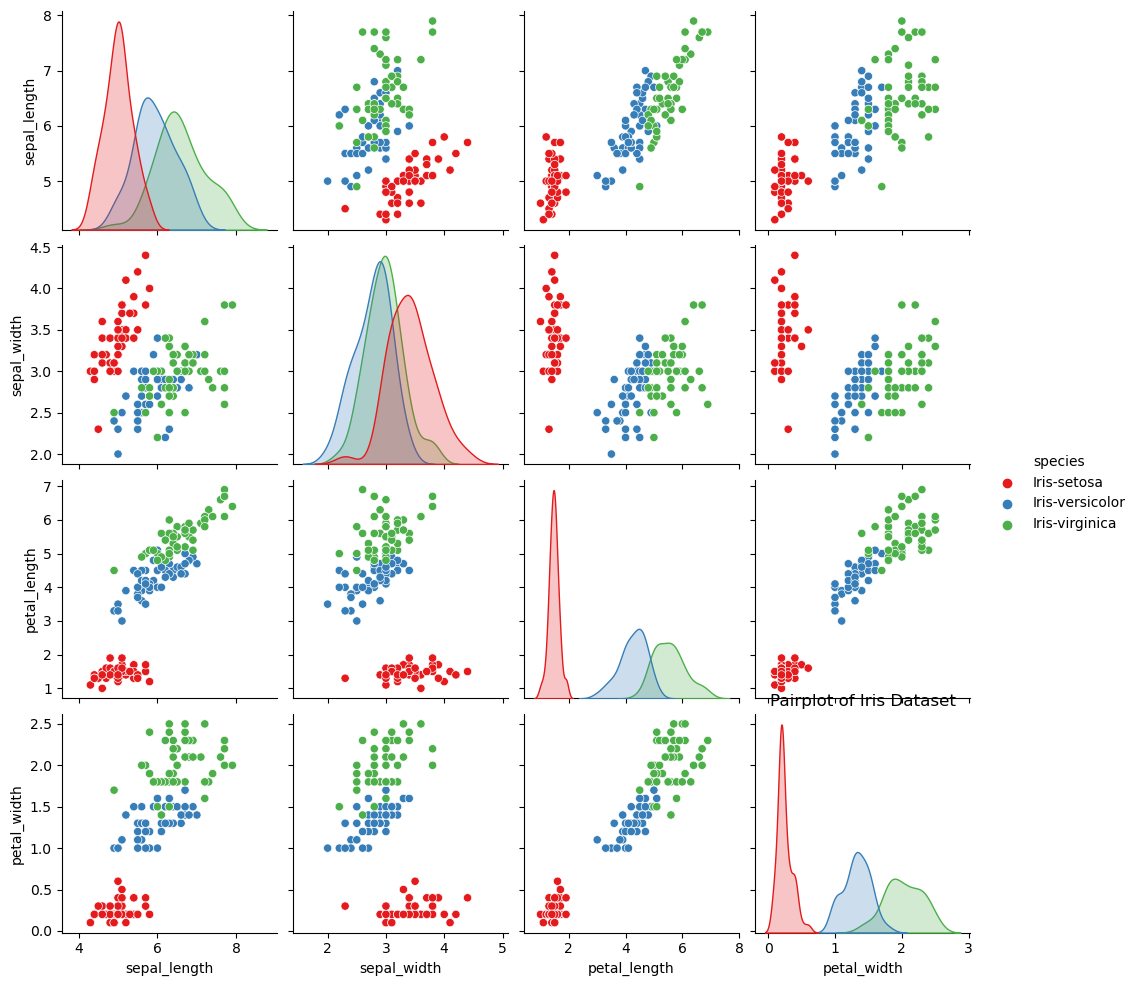

In [10]:
# Pairplot: Pairwise scatter plots and histograms for each feature
sns.pairplot(iris, hue='species', palette='Set1')
plt.title("Pairplot of Iris Dataset")
plt.show()



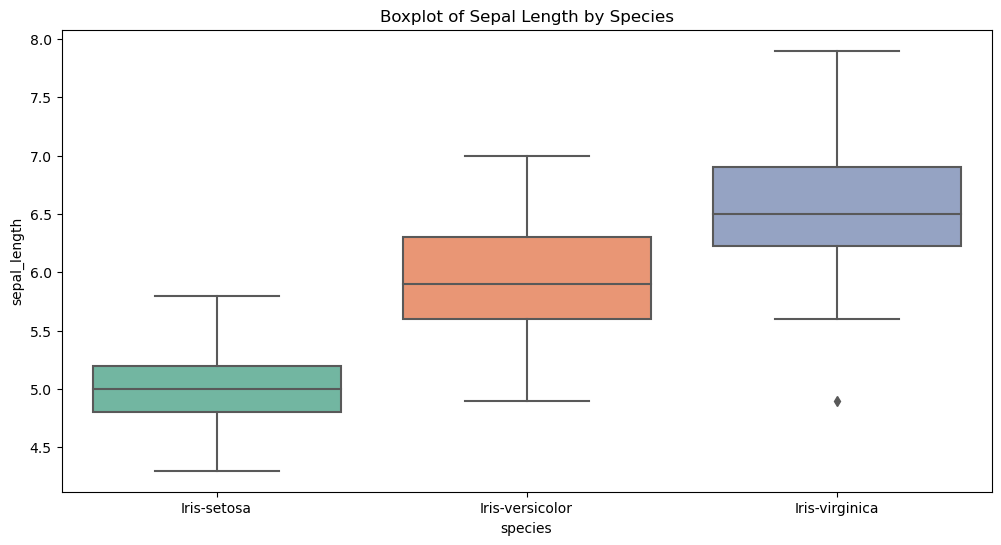

In [11]:
# Boxplot: Box-and-whisker plots for each feature by species
plt.figure(figsize=(12, 6))
sns.boxplot(data=iris, x='species', y='sepal_length', palette='Set2')
plt.title("Boxplot of Sepal Length by Species")
plt.show()

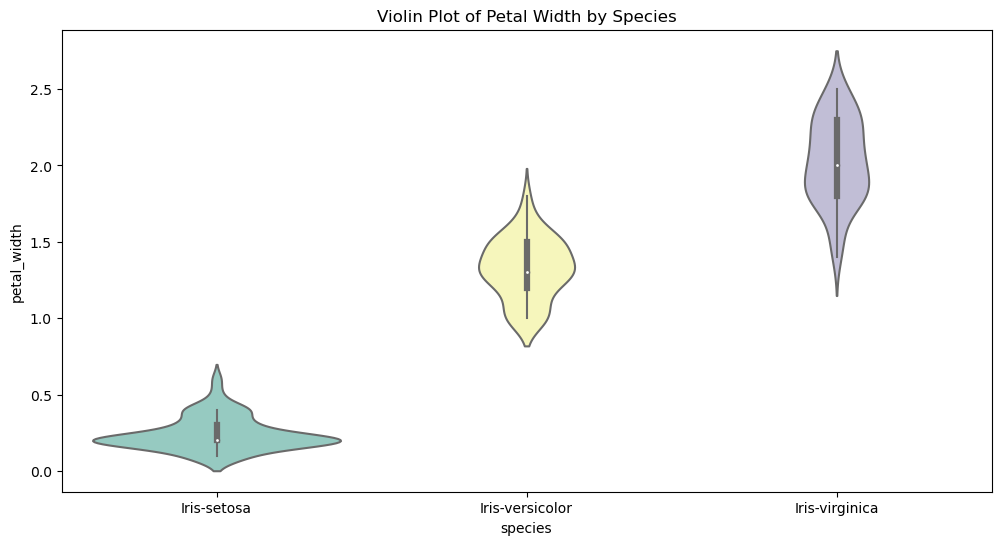

In [12]:
# Violin plot: Violin plots to visualize the distribution of each feature by species
plt.figure(figsize=(12, 6))
sns.violinplot(data=iris, x='species', y='petal_width', palette='Set3')
plt.title("Violin Plot of Petal Width by Species")
plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


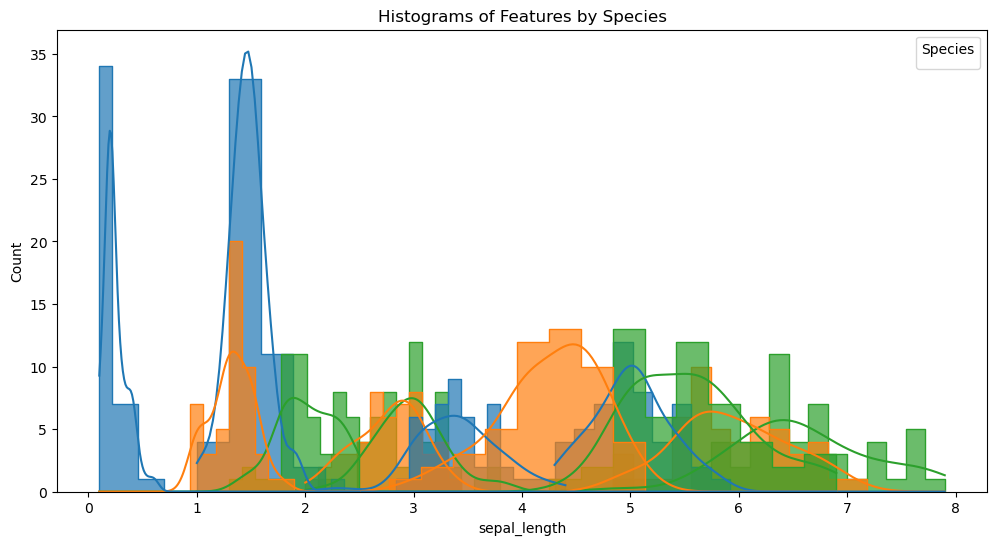

In [13]:
# Histograms of features by species
plt.figure(figsize=(12, 6))
for feature in iris.columns[:-1]:
    sns.histplot(data=iris, x=feature, hue='species', element='step', kde=True, bins=20, alpha=0.7)
plt.title("Histograms of Features by Species")
plt.legend(title="Species")
plt.show()




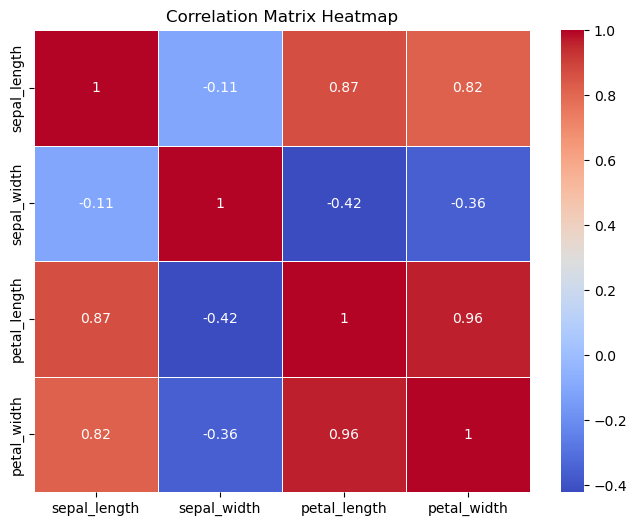

In [14]:
# Correlation matrix heatmap
correlation_matrix = iris.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [15]:
iris.isnull().sum().sort_values(ascending= False)

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

X = iris.drop(['species'],axis=1)
y = iris['species']

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the resulting sets
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

Training data shape: (120, 4) (120,)
Testing data shape: (30, 4) (30,)


In [17]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2


In [18]:
y_train.head()

22        Iris-setosa
15        Iris-setosa
65    Iris-versicolor
11        Iris-setosa
42        Iris-setosa
Name: species, dtype: object

In [34]:
# DECISION TREE CLASSIFIER 

from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
decision_tree.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_decision_tree = decision_tree.predict(X_test)

#Evaluate the model using accuracy score
accuracy = accuracy_score(y_test, y_pred_decision_tree)
print("Accuracy:", accuracy* 100 ,'%')

#confusion matrix
confusion = confusion_matrix(y_test, y_pred_decision_tree)
print("Confusion Matrix:\n", confusion)

# classification report
class_report = classification_report(y_test, y_pred_decision_tree)
print("Classification Report:\n", class_report)

Accuracy: 100.0 %
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [33]:
# RANDOM FOREST CLASSIFIER

from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
random_forest = RandomForestClassifier(random_state=42)

# Train the model on the training data
random_forest.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_random_forest = random_forest.predict(X_test)

# Evaluate the model using accuracy score
accuracy = accuracy_score(y_test, y_pred_random_forest)
print("Accuracy:", accuracy* 100 ,'%')

#confusion matrix
confusion = confusion_matrix(y_test, y_pred_random_forest)
print("Confusion Matrix:\n", confusion)

# classification report
class_report = classification_report(y_test, y_pred_random_forest)
print("Classification Report:\n", class_report)

Accuracy: 100.0 %
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [32]:


from sklearn.svm import SVC

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the model on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the model using accuracy score
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy * 100 ,'%')

#confusion matrix
confusion = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:\n", confusion)

# classification report
class_report = classification_report(y_test, y_pred_svm)
print("Classification Report:\n", class_report)

Accuracy: 100.0 %
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

